In [74]:
import glob
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import label
from skimage.measure import regionprops
import numpy as np
from skimage.color import rgb2grey 
from skimage.filters import frangi, sobel, gaussian

In [75]:
# Extracting file names
nameIdx = 17

allfiles = glob.glob("./croppedE-ophta/*")
print(allfiles[0][nameIdx:])

DS000QA2.JPG


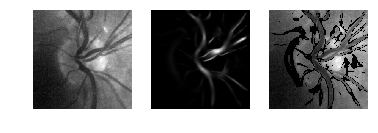

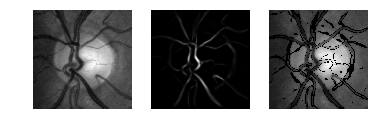

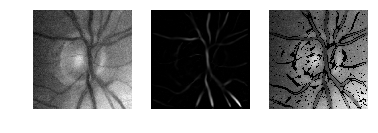

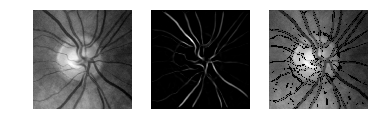

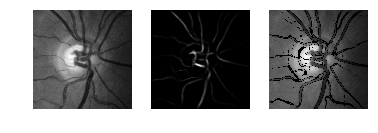

In [86]:
for i in range(13,18):
    
    # Reading the image
    im = cv2.imread(allfiles[i])
    im = (((im-im.min()) / (im.max()-im.min()))*1).astype(np.float32)
    
    imGray = rgb2grey(im)  
    imGrayNew = (((imGray-imGray.min())/(imGray.max()-imGray.min()))*255).astype(np.float32) 

    # Frangi filter
    frangiImage = frangi(imGray)
    frangiImageSc = (((frangiImage-frangiImage.min())/(frangiImage.max()-frangiImage.min()))*1).astype(np.float32)
    
    frangiImageSc[frangiImageSc < 0.009] = 0.3
    frangiImageSc[frangiImageSc > 0.05] = 1
    
    # Multiplication frangi image and gray equlize image
    imRes = imGrayNew*frangiImageSc
    imRes = (((imRes-imRes.min())/(imRes.max()-imRes.min()))*255).astype(np.uint8)

    # Plotting results        
    plt.figure(1)
    plt.subplot(131)          
    plt.imshow(imGray, cmap='gray')
    plt.axis('off')

    plt.subplot(132)      
    plt.imshow(frangiImage, cmap='gray')
    plt.axis('off')

    plt.subplot(133)      
    plt.imshow(imRes, cmap='gray')
    plt.axis('off') 

    plt.show() 

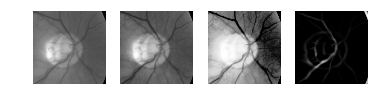

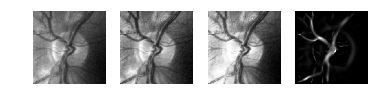

In [3]:
for i in range(0,2):
    
    # Reading the image
    im = cv2.imread(allfiles[i])  
    imGray = rgb2grey(im)
    
    imGray = gaussian(imGray, mode='reflect')
    imGray = (((imGray-imGray.min())/(imGray.max()-imGray.min()))*255).astype(np.uint8)
 
    
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
    imGrayClahe = clahe.apply(imGray)

    # histogram equalization
    equ = cv2.equalizeHist(imGray)

    # Frangi filter
    frangiImage = frangi(imGray)

    # Plotting results        
    plt.figure(1)
    plt.subplot(141)          
    plt.imshow(imGray, cmap='gray')
    plt.axis('off')


    plt.subplot(142)      
    plt.imshow(imGrayClahe, cmap='gray')
    plt.axis('off')

    plt.subplot(143)      
    plt.imshow(equ, cmap='gray')
    plt.axis('off')    

    plt.subplot(144)      
    plt.imshow(frangiImage, cmap='gray') 
    plt.axis('off')

    plt.show()  